# Notebook4 Jafuno Douba

# Question 1

In [1]:
ozone <- read.table('ozone.txt',header=T)
head(ozone)
dim(ozone)
names(ozone)

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
20010601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
20010602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
20010603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
20010604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
20010605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
20010606,80,17.7,19.8,18.3,6,6,7,-5.6382,-5.0000,-6.0000,94,Ouest,Pluie


[1] 112  13

[1] "maxO3"  "T9"     "T12"    "T15"    "Ne9"    "Ne12"   "Ne15"   "Vx9"   
 [9] "Vx12"   "Vx15"   "maxO3v" "vent"   "pluie"

# Question 2

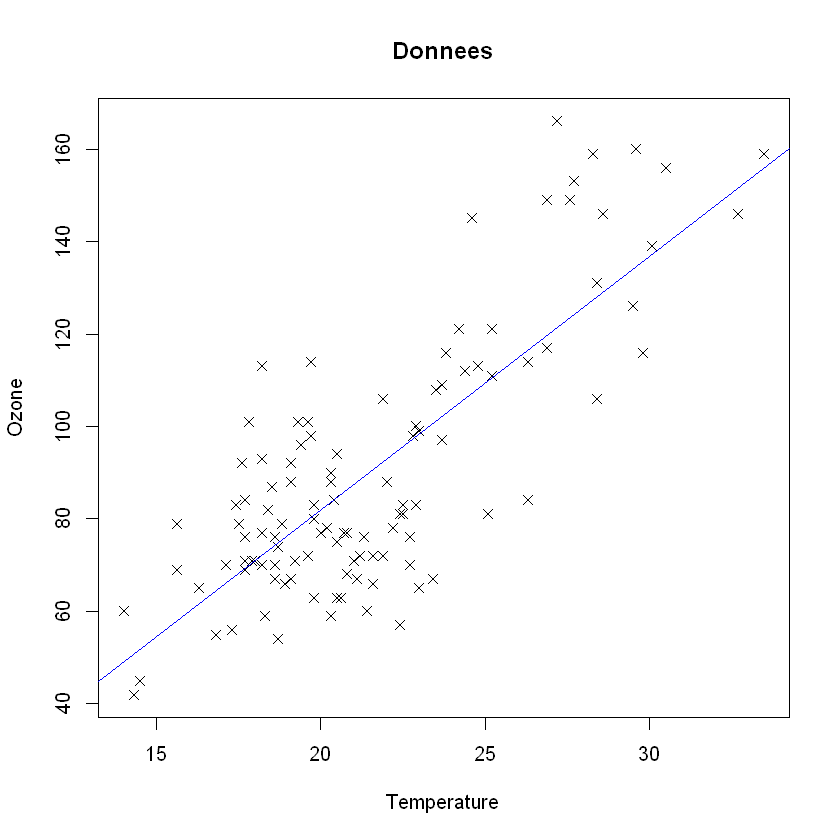

In [2]:
reg <- lm(maxO3~T12, data = ozone)
plot(ozone$T12, ozone$maxO3, pch = 4, xlab = 'Temperature', ylab = 'Ozone', main = 'Donnees')
abline(coef(reg), col = 'blue')

Afin de voir le résultat du test de significatif, il suffit d'afficher le résumé du résultat de la régression.

In [3]:
summary(reg)


Call:
lm(formula = maxO3 ~ T12, data = ozone)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.079 -12.735   0.257  11.003  44.671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27.4196     9.0335  -3.035    0.003 ** 
T12           5.4687     0.4125  13.258   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.57 on 110 degrees of freedom
Multiple R-squared:  0.6151,	Adjusted R-squared:  0.6116 
F-statistic: 175.8 on 1 and 110 DF,  p-value: < 2.2e-16


La p-valeur de $\beta_1$ est inférieure à $2\times10^{-16}$, ce qui indique que $\beta_1$ est non nul.

La p-valeur de $\beta_0$ est de 0.003, ce qui signifie qu'on rejette $H_0$ à tous les niveaux habituels. Il est alors fortement recommandé d'inclure la constante dans le modèle.

Ajoutons la droite de régression dans le modèle réduit sans la constante

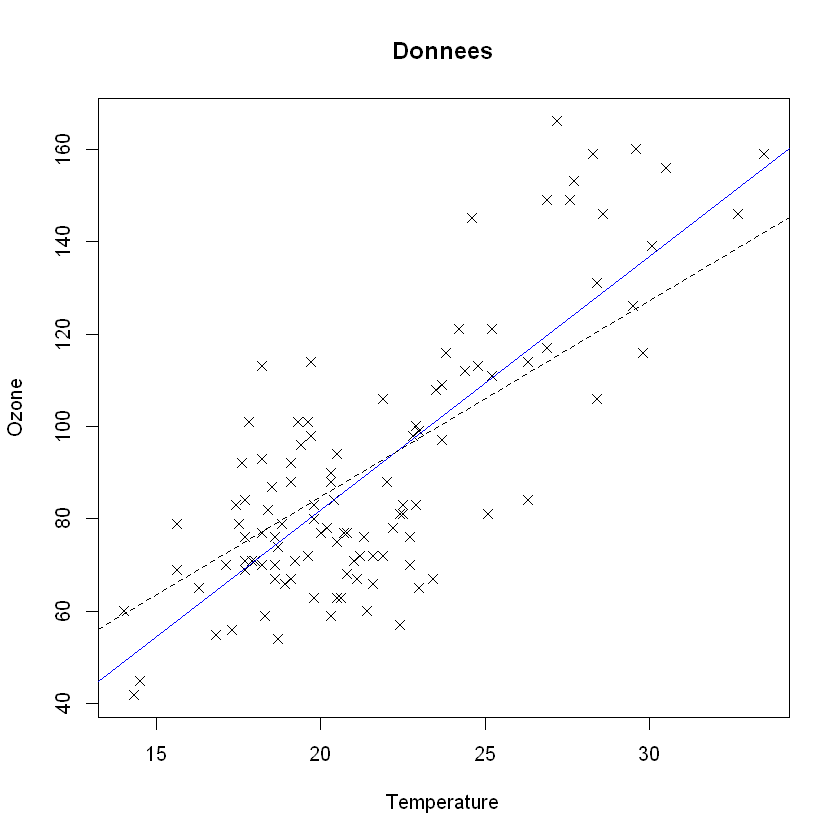

In [4]:
sans.intercept <- lm(maxO3~T12 - 1, data = ozone)
plot(ozone$T12, ozone$maxO3, pch = 4, xlab = 'Temperature', ylab = 'Ozone', main = 'Donnees')
abline(coef(reg), col = 'blue')
abline(0, coef(sans.intercept), lty = 2)

La droite change sensiblement de pente.

# Question 3

In [5]:
beta1 <- cov(ozone$maxO3,ozone$T12)/var(ozone$T12)
beta0 <- mean(ozone$maxO3) - beta1*mean(ozone$T12)

beta0
beta1
coef(reg)

[1] -27.41964

[1] 5.468685

(Intercept)         T12 
 -27.419636    5.468685

Nous obtenons bien les mêmes valeurs que dans **coef(reg)**.

# Question 4

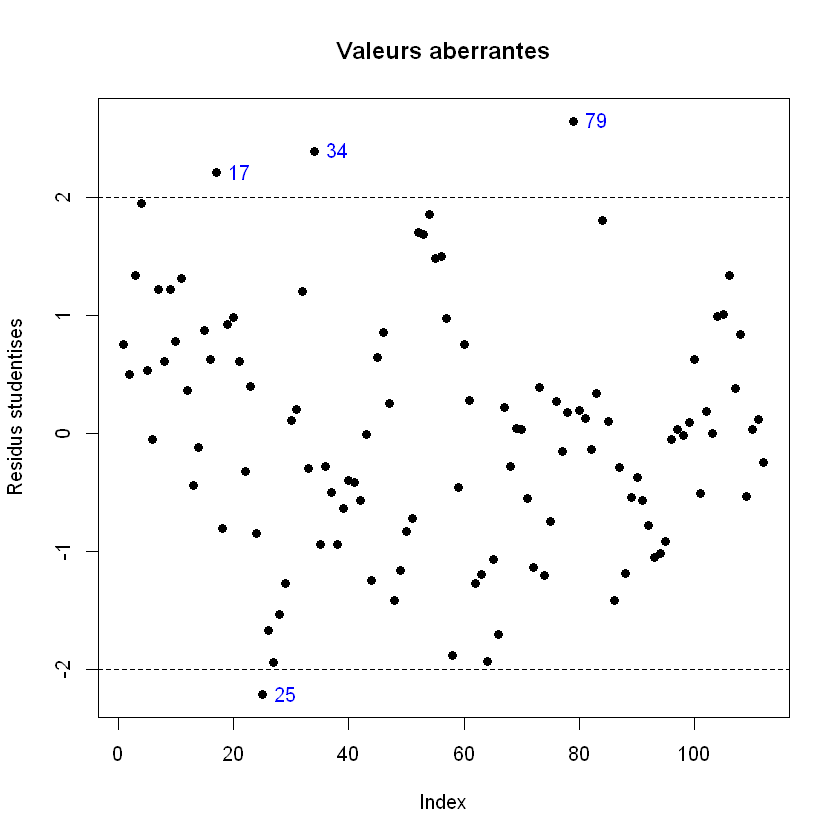

In [6]:
residus <- rstudent(reg)
n <- length(ozone$maxO3)
plot(1:n, residus, pch = 16, xlab = 'Index', ylab = 'Residus studentises',
     main = 'Valeurs aberrantes')
abline(-2, 0, lty = 2)
abline(2, 0, lty = 2)
IDval.ab <- (1:n)[abs(residus)>2]
text(IDval.ab, residus[IDval.ab], IDval.ab, pos = 4, col = 'blue')

Il n'y a que 4 observations en dehors de l'intervalle $[-2,2]$, ce qui est acceptable pour un jeu de données de taille 112. De plus, ces résidus ne sont pas très éloignés des limites d'intervalle. Ce ne sont pas de véritables observations aberrantes, elles sont juste un peu limites.

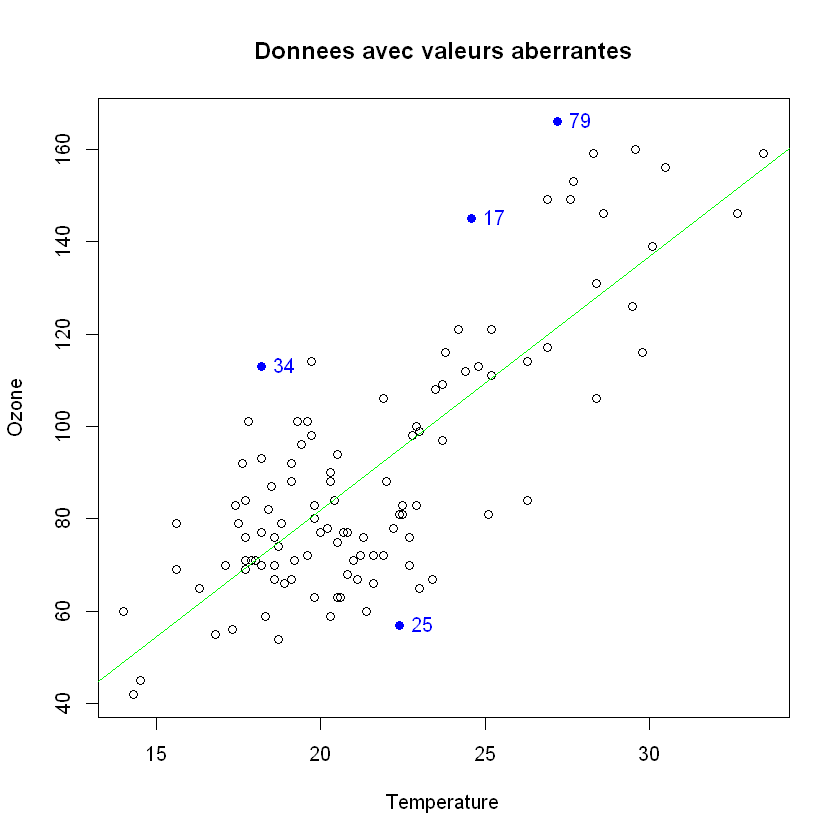

In [7]:
plot(ozone$T12, ozone$maxO3, xlab = 'Temperature', ylab = 'Ozone',
     main = 'Donnees avec valeurs aberrantes')
abline(coef(reg), col = 'green')
points(ozone$T12[IDval.ab], ozone$maxO3[IDval.ab], col = 'blue', pch = 16) 
text(ozone$T12[IDval.ab], ozone$maxO3[IDval.ab], IDval.ab, pos = 4, col = 'blue')

# Question 5 

D'après le théorème du cours, si les residus $\varepsilon_i$ suivent la loi normale $\mathcal N(0,\sigma^2)$, alors les résidus studentisés suivent la loi de Student $\mathcal T(n-p-1)$. Commençons par calculer les quantiles d'ordre $i/n$ de la loi $\mathcal T(n-p-1)$, puis traçons un QQ-plot.

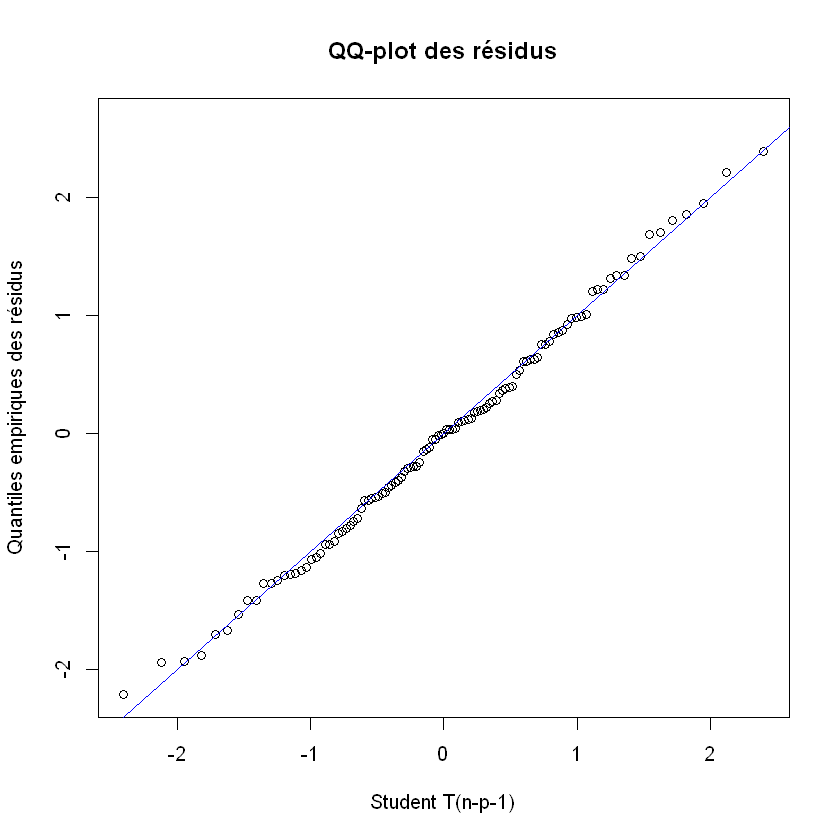

In [8]:
quant.t <- qt((1:n)/n,n-3)
plot(quant.t, sort(residus), xlab = 'Student T(n-p-1)',
     ylab = 'Quantiles empiriques des résidus', main = 'QQ-plot des résidus')
abline(0, 1, col ='blue')

L'alignement des points sur la première bissectrice est parfaite, ce qui confirme l'hypothèse selon laquelle les residus théoriques $\varepsilon_i$ suivent la loi normale $\mathcal N(0,sigma^2)$.

# Question 6

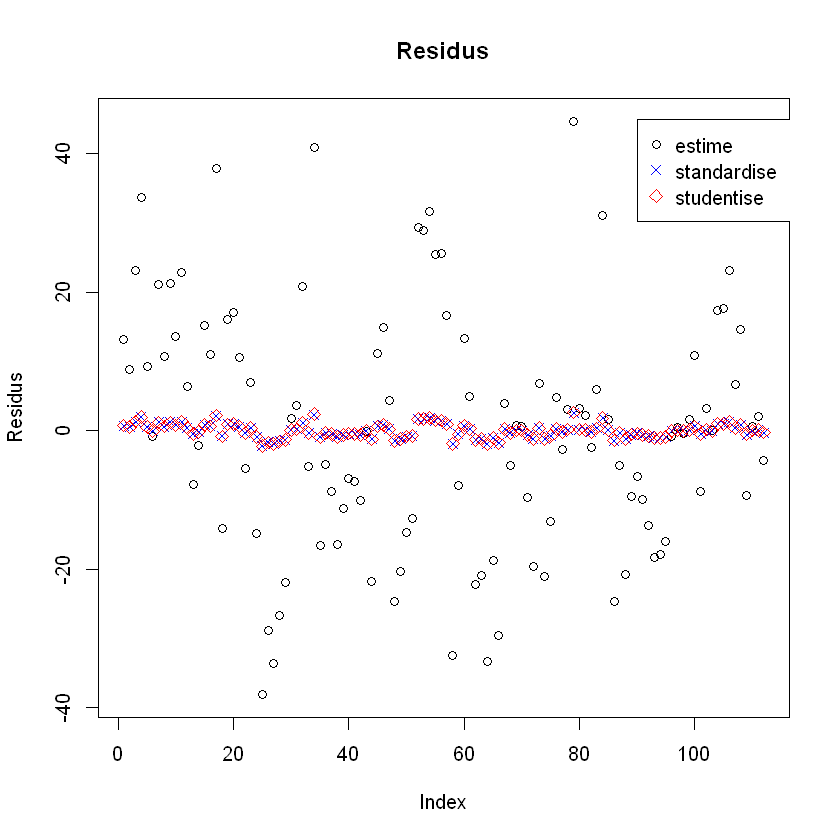

In [9]:
residus.std <- rstandard(reg)
plot(1:n, reg$residuals, main = 'Residus', xlab = 'Index', ylab = 'Residus')
points(1:n, residus.std, pch = 4, col = 'blue')
points(1:n, residus, pch = 5, col = 'red')
legend(90, 45, c('estime', 'standardise', 'studentise'),
       col = c('black', 'blue', 'red'), pch = c(1, 4, 5)
       )


On voit que les résidus esitmés ne sont pas du tout à la même échelle puisqu'ils ne sont pas standardisés. Afin de mieux comparer les résidus standardisés aux résidus studentisés, on considère le graphique suivant :


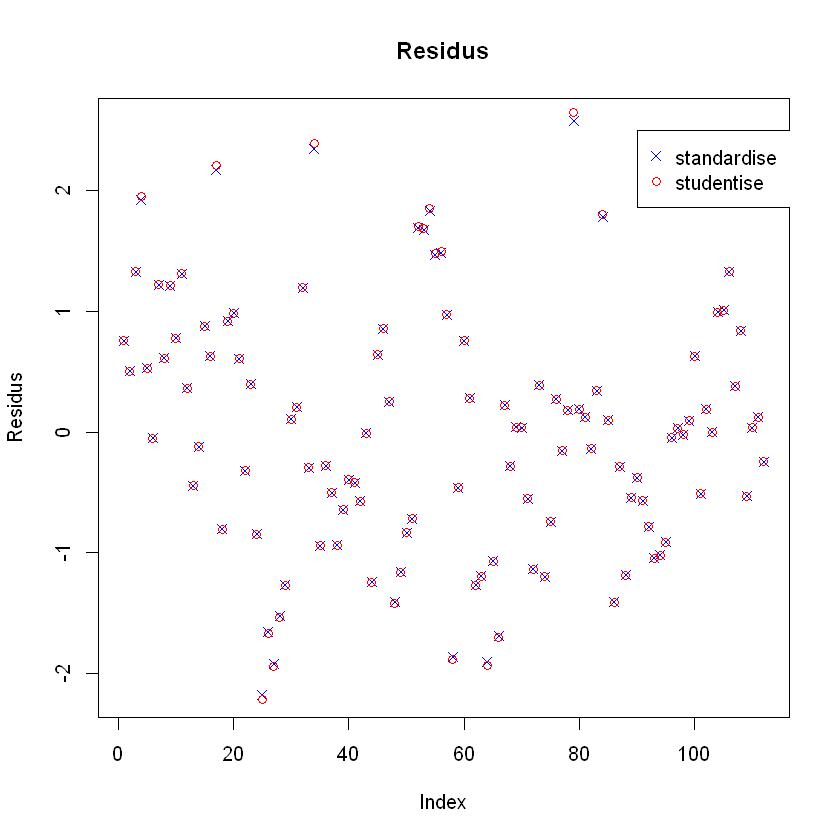

In [10]:
plot(1:n, residus.std, pch = 4, col = 'blue', main = 'Residus', xlab = 'Index',
     ylab = 'Residus')
points(1:n, residus, col = 'red')
legend(90, 2.5 , c('standardise', 'studentise'), col = c('blue', 'red'), pch = c(4, 1))

Nous voyons que pour la grande majorité des points les deux résidus sont quasi identiques. Des légéres différences n'apparaissent que pour les résidus dont la valeur abolue est relativement élevée. Dans ce cas, les valeurs des résidus studentisés (en valeur absolue) sont plus élevées.

# Question 7


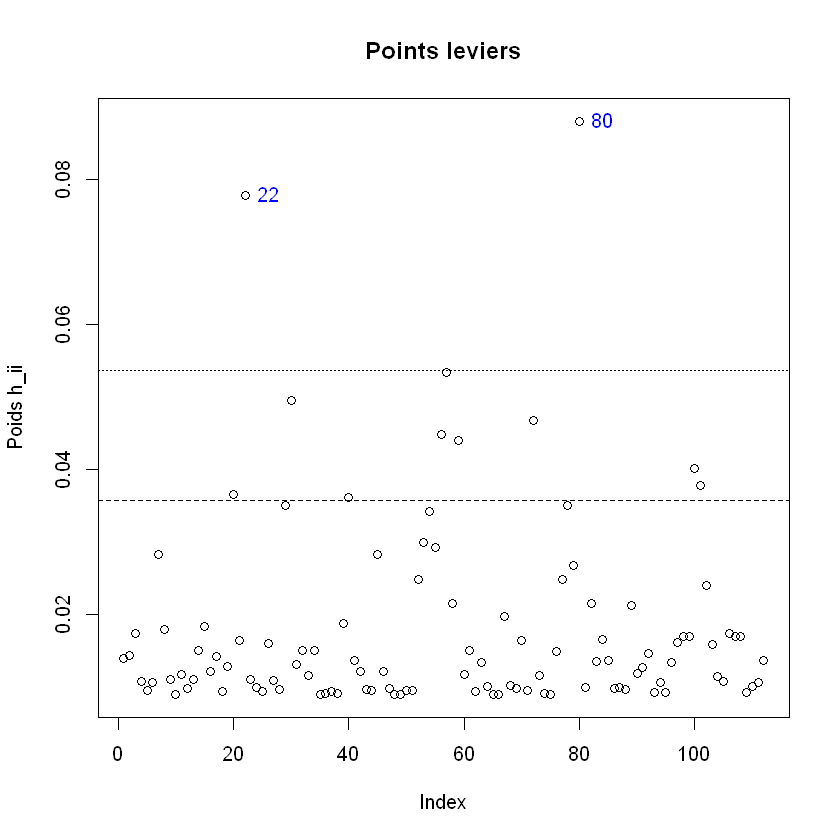

In [11]:
levier <- hatvalues(reg)
plot(1:n, levier, xlab = 'Index', ylab = 'Poids h_ii', main = 'Points leviers')
p <- reg$rank
seuil1 <- 2*p/n
seuil2 <- 3*p/n
abline(seuil1, 0, lty = 2)
abline(seuil2, 0, lty = 3)
IDlev <- (1:n)[levier>seuil2]
text(IDlev, levier[IDlev], IDlev, pos = 4, col = 'blue')

Les données contiennent deux observations qui sont leviers, leurs poids est nettement au-dessus du deuxième seuil. 
De plus, il y a 9 autres observations dont le poids est légèrement élevés.

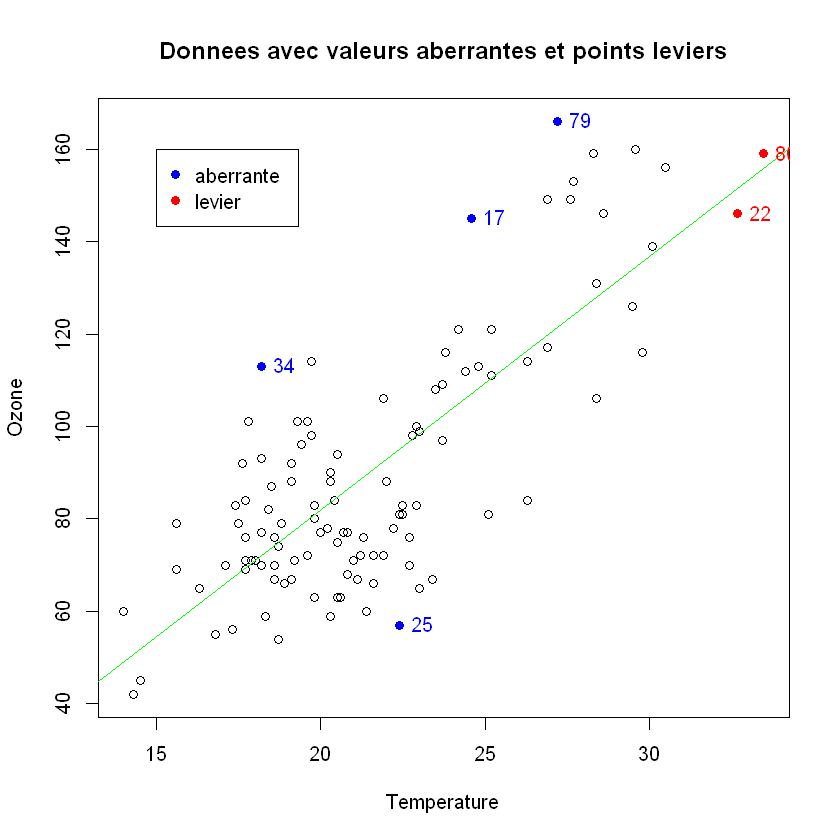

In [12]:
plot(ozone$T12, ozone$maxO3, xlab = 'Temperature', ylab = 'Ozone',
     main = 'Donnees avec valeurs aberrantes et points leviers')
abline(coef(reg), col = 'green')
points(ozone$T12[IDval.ab], ozone$maxO3[IDval.ab], col = 'blue', pch = 16) 
text(ozone$T12[IDval.ab], ozone$maxO3[IDval.ab], IDval.ab, pos = 4, col = 'blue')
points(ozone$T12[IDlev], ozone$maxO3[IDlev], col = 'red', pch = 16) 
text(ozone$T12[IDlev], ozone$maxO3[IDlev], IDlev, pos = 4, col = 'red')
legend(15, 160, c('aberrante', 'levier'), col = c('blue','red'), pch = 16)

# Question 8 

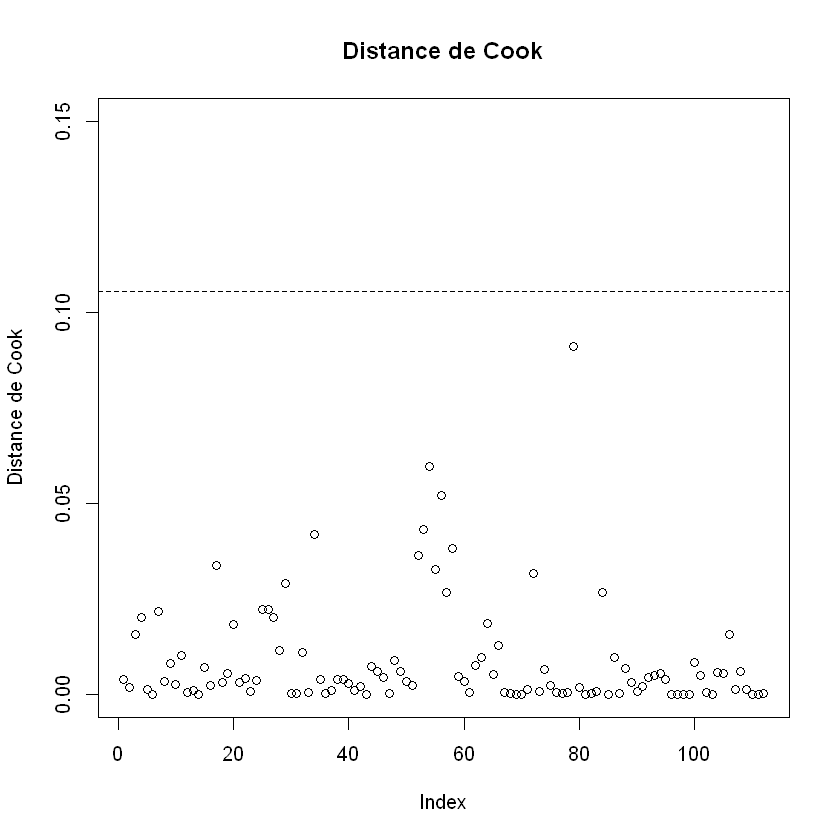

In [13]:
cook <- cooks.distance(reg)
plot(1:n, cook, xlab = 'Index', ylab = 'Distance de Cook', main = 'Distance de Cook',
     ylim = c(0,.15))
s1 <- qf(0.5, p, n-p)
s2 <- qf(0.1, p, n-p)
abline(s2, 0, lty = 2)
abline(s1, 0, lty = 3)

 Aucun point n'est suspect selon le critère de la distance de Cook. Rappelons que dans la distance de Cook interviennent le poids h_ii (qui est élevé pour les points leviers) ainsi que le résidu (élevé pour les valeurs aberrantes). 

La distance de Cook combine alors les caractéristiques des points leviers et des valeurs aberrantes. Dans notre jeu de données il n'y a pas de points qui est à la fois levier et aberrant, ce qui explique les poids faibles de toutes les observations.


# Question 9
Vérifions d'abord le type de la variable  **T12**

In [14]:
class(ozone$T12)

[1] "numeric"

Créons un data.frame pour la fonction predcit :

In [15]:
T12tri = data.frame(T12=sort(ozone$T12))
class(T12tri)

[1] "data.frame"

Calculons les intervalles de confiance

In [16]:
int.pred <- predict(reg, T12tri, interval = "pred")
int.conf <- predict(reg, T12tri, interval = "conf")

Traçons le nuage des points et les intervalles 

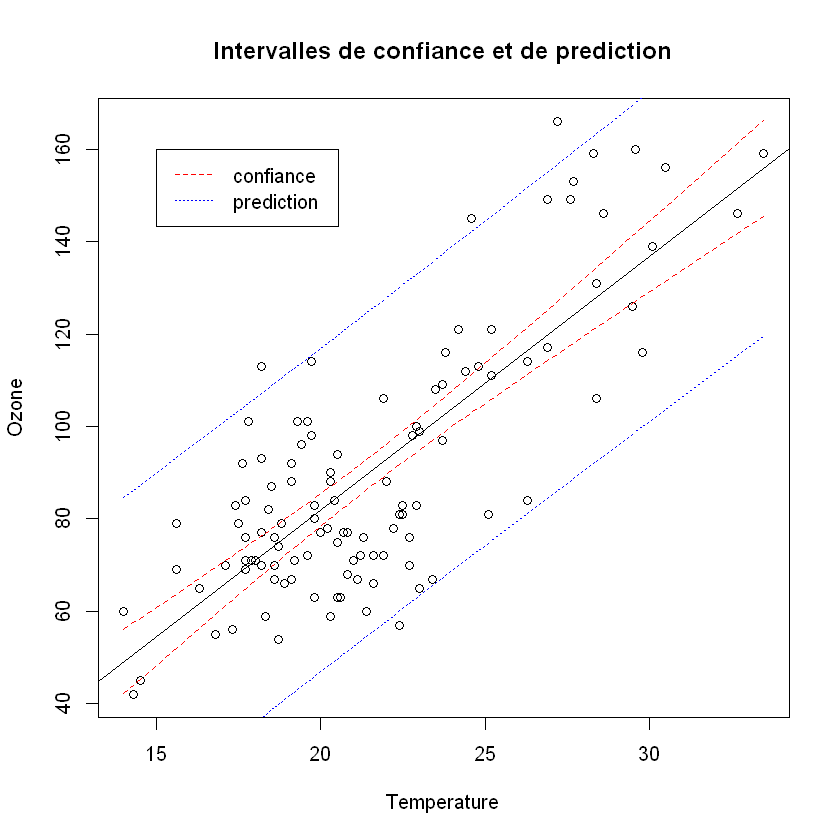

In [17]:
plot(ozone$T12, ozone$maxO3, xlab = 'Temperature', ylab = 'Ozone',
     main='Intervalles de confiance et de prediction')
abline(reg)
lines(T12tri$T12, int.conf[,2], lty=2, col='red')
lines(T12tri$T12, int.conf[,3], lty=2, col='red')
lines(T12tri$T12, int.pred[,2], lty=3, col='blue')
lines(T12tri$T12, int.pred[,3], lty=3, col='blue')
legend(15,160,c('confiance','prediction'),lty=c(2,3),col=c('red','blue'))

On observe que les intervalles de confiance sont bien plus étroits que les intervalles de prédiction. Les deux types d'intervalles sont plus étroits dans la zone autour de T12=20 où la plupart des observations de T12 s'accumulent.
Plus qu'on s'éloigne de T12=20, plus les intervalles sont larges.
Ce phénomène est normal et comprehensible, car on a plus de certitude dans une zone avec d'observations que dans une zone avec peu de points observés.

Ajoutons les observations atypiques

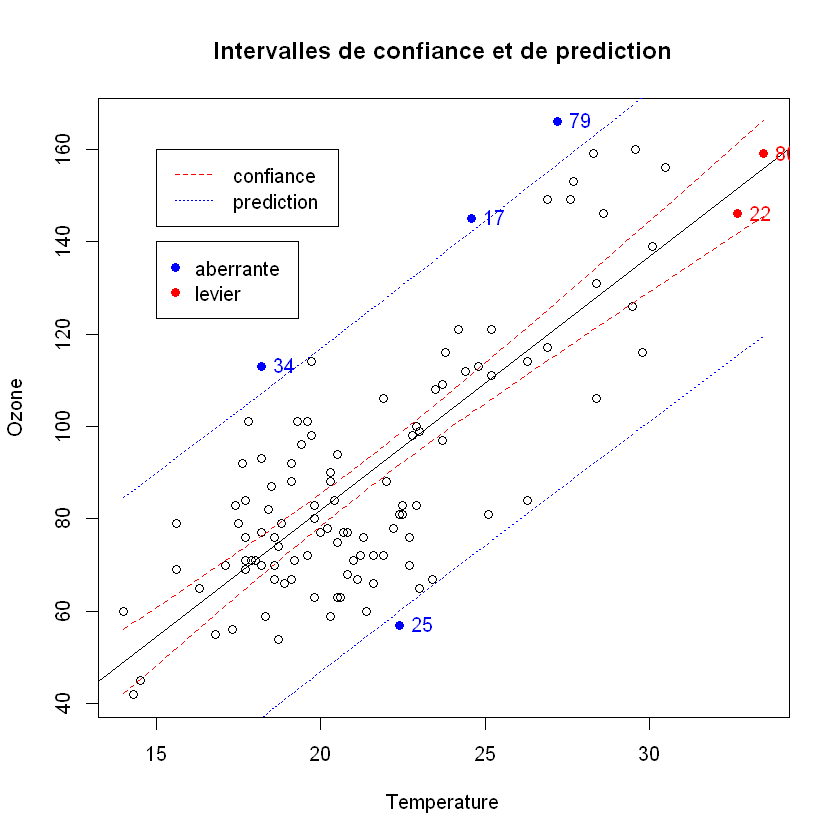

In [18]:
plot(ozone$T12, ozone$maxO3, xlab = 'Temperature', ylab = 'Ozone',
     main='Intervalles de confiance et de prediction')
abline(reg)
lines(T12tri$T12, int.conf[,2], lty=2, col='red')
lines(T12tri$T12, int.conf[,3], lty=2, col='red')
lines(T12tri$T12, int.pred[,2], lty=3, col='blue')
lines(T12tri$T12, int.pred[,3], lty=3, col='blue')
legend(15,160,c('confiance','prediction'),lty=c(2,3),col=c('red','blue'))

points(ozone$T12[IDval.ab], ozone$maxO3[IDval.ab], col='blue', pch=16) 
text(ozone$T12[IDval.ab], ozone$maxO3[IDval.ab], IDval.ab, pos=4, col='blue')
points(ozone$T12[IDlev], ozone$maxO3[IDlev], col='red', pch=16) 
text(ozone$T12[IDlev], ozone$maxO3[IDlev], IDlev,pos=4,col='red')
legend(15,140,c('aberrante','levier'),col=c('blue','red'),pch=16)

On voit que les valeurs aberrantes sont les points en dehors de l'intervalle de prédiction. Les points leviers se trouvent dans les intervalles de confiance, ce qui indique qu'ils sont des points qui correspondent bien au modèle malgré leur éloignement des autres observations. C'est l'explication pourquoi leur distance de Cook n'est pas trop importante.